## Using an Image

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

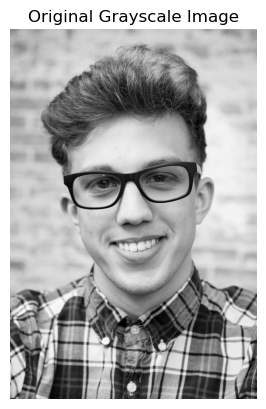

In [5]:
# Load and convert the image to grayscale
img = Image.open('Test.jpg').convert('L')  # 'L' mode = grayscale
img_array = np.array(img)

# Display the image
plt.imshow(img_array, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [12]:
X = img_array / 255.0  # Normalize pixel values
X_centered = X - X.mean(axis=0)

In [36]:
# Apply PCA
pca = PCA(n_components=0.95)  # atlease 95% of total variance
X_pca = pca.fit_transform(X_centered)

In [38]:
# Reconstruct the image using the first principal component
X_reconstructed = pca.inverse_transform(X_pca)

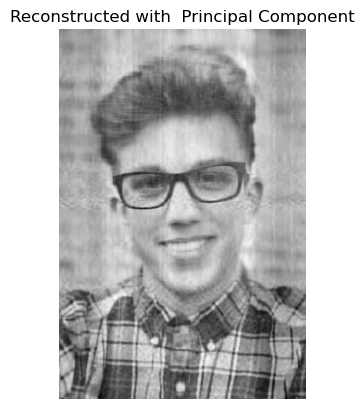

In [40]:
# Plot reconstructed image
plt.imshow(X_reconstructed, cmap='gray')
plt.title("Reconstructed with  Principal Component")
plt.axis('off')
plt.show()

In [42]:
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")

Reconstruction Error: 0.3899


## Using Wine Dataset

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [46]:
dataset = pd.read_csv('wine.csv')
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values

In [48]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [62]:
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [64]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


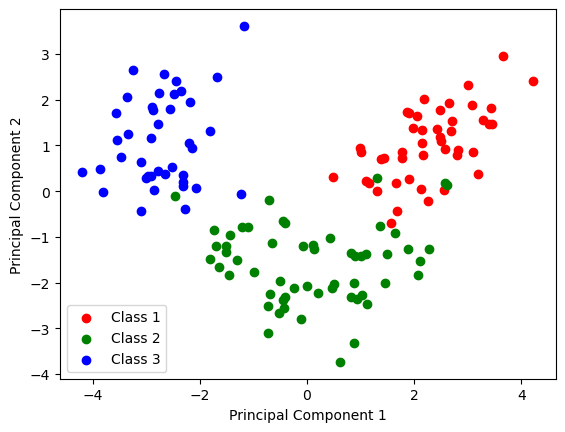

In [66]:
# plot the first two principal components with labels
colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()